In [1]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/05_solvent_chi_flat/py_files')

import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

import pandas as pd
import numpy as np

from create_in import create_in
from out_reader import out_reader
from scipy.signal import find_peaks

# График: поменяли диэлектрическую проницаемость среды

Бъеррумовская длина lb:

$l_B = \frac{e^2}{4 \pi \epsilon_0 \epsilon_r k_B T}$

* $e$ = 	1.602176634×10−19 C
* $\epsilon_0$ = 8.8541878188(14)×10−12
* \epsilon_r = 80
* $k_B$ = 1.380649×10−23
* T = 293

In [2]:
import scipy.constants as const

# Заданные значения
lb = 1.0e-9  # Бьеррумовская длина в метрах
e = const.e  # заряд электрона в Кулонах
epsilon_0 = const.epsilon_0  # электрическая постоянная в Ф/м
k_B = const.k  # постоянная Больцмана в Дж/К
T = 293  # температура в Кельвинах

# Уравнение для расчета epsilon_r
def calculate_epsilon_r(lb, e, epsilon_0, k_B, T):
    return e**2 / (4 * const.pi * epsilon_0 * lb * k_B * T)

# Вычисляем epsilon_r
epsilon_r = calculate_epsilon_r(lb, e, epsilon_0, k_B, T)

print(f"Относительная диэлектрическая проницаемость (epsilon_r): {epsilon_r:.2f}")

Относительная диэлектрическая проницаемость (epsilon_r): 57.03


In [3]:
# pow(10, -2) * 1.66

N = 600

S_namics = 50

alpha = 0.4

Cs = 0.0166

chi = 2.5

chi_surf = 0.5
chi_ions = 0.5

epsilon_r


57.03103989702639

In [4]:
file_name_pro = create_in(
        range_param = 'eps',
        min_val = 80,
        max_val = 80,
        Cs = Cs,
        chi_first_try = 0.5,
        chi_ions_first_try = 0.5,
        chi_surf_first_try = 0.5,
        N_layers_first_try = N - 250,
        N_first_try = N,

        S = S_namics,
        alpha = alpha,
        Kuhn = '1e-09',
        initial_cond = True,
        
        N_layers = N - 250,
        N = N,
        chi = chi,
        chi_ions = chi,
        chi_surf = chi,
    )
psi, phi_brush, phi_end_brush, phi_Na, phi_Cl = out_reader(alpha = alpha,file_names=file_name_pro)

No output defined! 
No output defined! 
Problem nr 1 out of 2
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.270883e+00 |g| = 6.014344e+00 alpha = 1.000000e+00 
hessian scaling: 1.5939
it =  1  E = 2.076942e+00 |g| = 5.534013e+00 alpha = 1.166269e-01 
it =  2  E = 2.616528e+00 |g| = 6.051954e+00 alpha = 7.599156e-02 
it =  3  E = 5.683266e+00 |g| = 5.610565e+00 alpha = 1.382791e-02 
it =  4  E = 2.417845e+01 |g| = 5.885334e+00 alpha = 8.485243e-04 
it =  5  E = 8.002411e+00 |g| = 5.825444e+00 alpha = 7.960393e-03 
hessian scaling: 2.8893


it =  6  E = 1.903982e+00 |g| = 5.111876e+00 alpha = 1.171661e-01 
it =  7  E = 1.546169e+00 |g| = 5.508598e+00 alpha = 1.852702e-01 
it =  8  E = 3.155602e+00 |g| = 5.708837e+00 alpha = 4.936551e-02 
it =  9  E = 2.280490e+01 |g| = 5.697523e+00 alpha = 8.830975e-04 
it =  10  E = 7.039485e+00 |g| = 5.588490e+00 alpha = 8.477513e-03 
it =  11  E = 1.001633e+01 |g| = 5.545544e+00 alpha = 3.882766e-03 
it =  12  E = 5.086004e+00 |g| = 5.385003e+00 alpha = 1.371121e-02 
it =  13  E = 4.468625e+00 |g| = 5.337552e+00 alpha = 1.657687e-02 
it =  14  E = 3.918263e+00 |g| = 5.181886e+00 alpha = 1.977417e-02 
it =  15  E = 3.429422e+00 |g| = 5.184214e+00 alpha = 2.449293e-02 
it =  16  E = 4.789845e+00 |g| = 5.024633e+00 alpha = 1.156269e-02 
it =  17  E = 3.027607e+00 |g| = 5.051054e+00 alpha = 2.774172e-02 
it =  18  E = 7.427226e+00 |g| = 4.879137e+00 alpha = 4.250558e-03 
it =  19  E = 2.657607e+00 |g| = 4.927779e+00 alpha = 3.211342e-02 
it =  20  E = 1.014020e+01 |g| = 5.080188e+00 alpha 

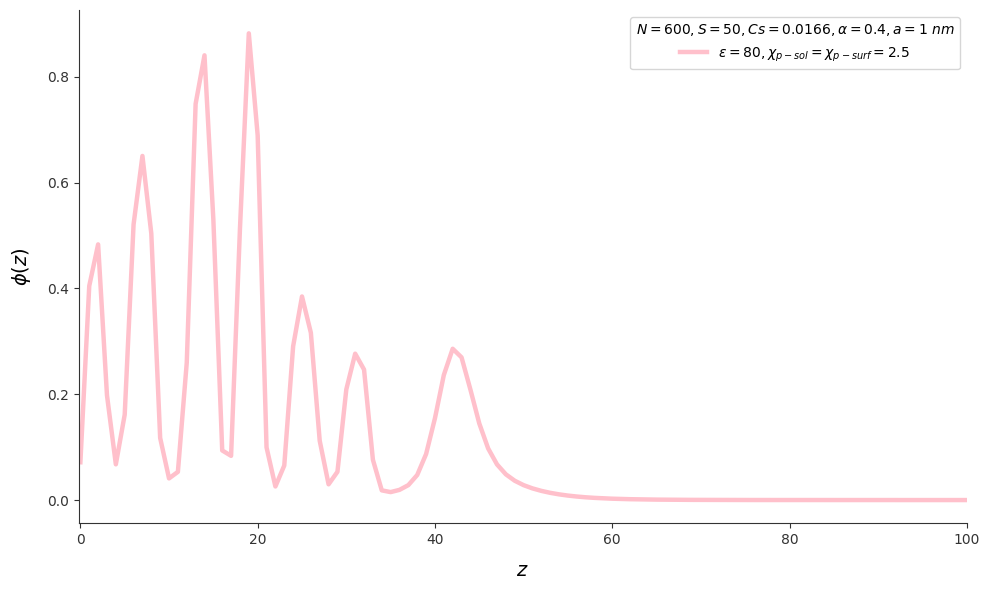

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))  # Создаем один график


ax.plot(phi_brush, color = 'pink', label=f'$ \\epsilon = { round(80)}, \\chi_{{p-sol}} = \\chi_{{p-surf}} ={round(chi, 2)}$', linewidth=3.2, linestyle="-")

# Настройка визуализации
ax.set_xlabel("$z$", fontsize=14, labelpad=10)
ax.set_ylabel("$\\phi(z)$", fontsize=14, labelpad=10)
ax.legend(fontsize=10, title=f'$N = {N}, S = {S_namics}, Cs = {Cs}, \\alpha = {alpha}, a = 1 \\ nm$', 
          title_fontsize=10, loc="upper right")

# Добавляем фон и рамку
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#333333")
ax.spines["bottom"].set_color("#333333")
ax.tick_params(axis='both', which='major', labelsize=10, colors="#333333")
ax.set_xlim(-0.2, 100)
# Убираем лишние отступы
plt.tight_layout()

# Отображаем график
plt.show()